In [16]:
''' numpy - типов данных
    pandas - чтения csv 
    wave - чтение wave файла
    os - проверка существования пути файла
'''

import numpy as np
import pandas as pd
import wave
import os


# Типы данных амплитуд
types = {
    1: np.int8,
    2: np.int16,
    4: np.int32,
}


# Открытие файла на разбор
def wave_open(filepath):
    if not os.path.exists(filepath):
        return None
    with open(filepath, 'r') as file_handler:
        wavf =  wave.open(filepath, mode='r')
        return wavf

''' Путь к файлу '''
wav = wave_open("/Users/nikita/Documents/python_3_filies/ML/ML_sound_1/output_eks.wav")

# Различные вкусности из wave-файла
''' Кол-во каналов '''
def nchannals():
    nchannals_var = wav.getnchannels()
    return nchannals_var

''' Длина семпла (int8, int16, int32) '''
def sampwidth():
    sampwidth_var = wav.getsampwidth()
    return  sampwidth_var

''' Частота окон '''
def framerate():
    framerate_var = wav.getframerate()
    return framerate_var

''' Кол-во окон '''
def nframes():
    nframes_var = wav.getnframes()
    return  nframes_var

''' Тип сжатия '''
def comptype():
    comptype_var = wav.getcomptype()
    return comptype_var

''' Название сжатия '''
def compname():
    compname_var = wav.getcompname()
    return compname_var

''' Длительность записи '''
def duration():
    duration_var = nframes()/framerate()
    return duration_var

# Значения амплитуд в 10-ричной системе счисления
def channel_data():
    byte_content = wav.readframes(nframes())
    samples = np.fromstring(byte_content, dtype=types[sampwidth()])
    #for n in range(nchannals()):
    channel = samples
    return channel

''' Битовые данные'''
byte_content = wav.readframes(nframes())

''' Представление битов в int8(16,32) '''
samples = np.fromstring(byte_content, dtype=types[sampwidth()])

''' Образка первых 1000 семплов, т.к. там ненужный шум, позже можно будет убрать '''
samples = samples[1000:]
#samples = samples[131000:132000]

''' Логарифмирование семплов + минимальное значение int16 (т.к. запись была в int16), ибо логарифм не может иметь отрицательный аргумент '''
samples_log = np.log(samples+32768)
len(samples)

263192

In [17]:
import matplotlib.pyplot as plt

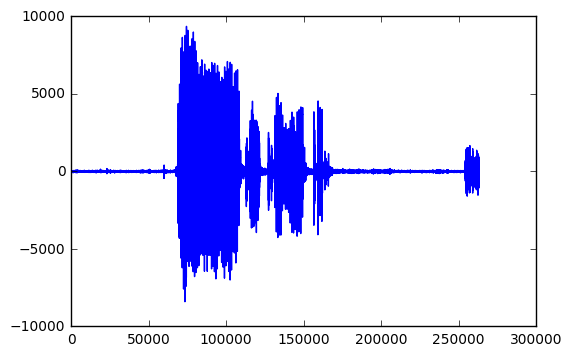

In [18]:
''' График оригинальных семплов '''
plt.plot(range(len(samples)),samples)
plt.show()

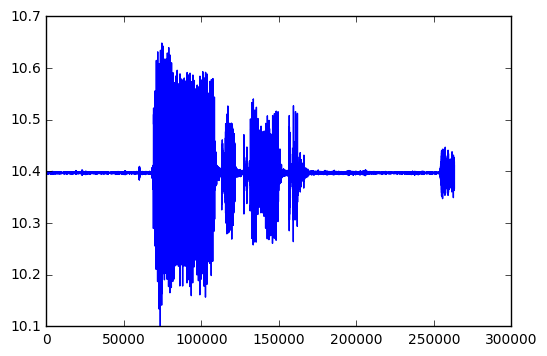

In [19]:
''' График прологарифмированных семплов (делее, лог-семплы) '''
plt.plot(range(len(samples_log)),samples_log)
plt.show()

In [20]:
''' Преобразование Фурье из прологарифмированных семплов '''
samples_fourier = np.fft.fft(samples_log)

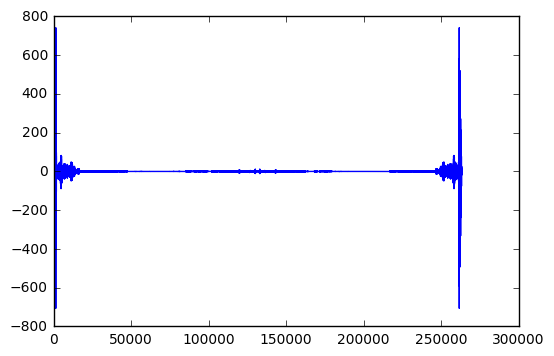

In [21]:
''' Действительная часть пребразования фурье '''
plt.plot(range(len(samples_fourier[1:])),samples_fourier.real[1:],)#'ro')
plt.show()

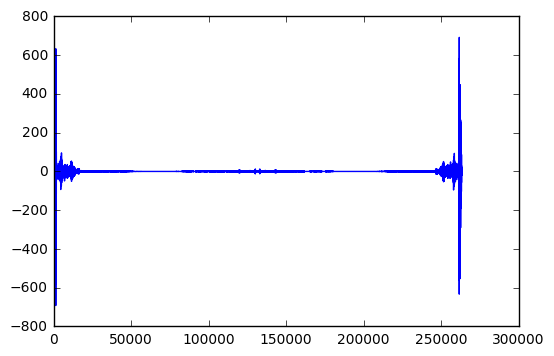

In [22]:
''' Комплексная часть пребразования фурье (подозрительно похоже чет))0)0))'''
plt.plot(range(len(samples_fourier[1:])),samples_fourier.imag[1:],)#'ro')
plt.show()

In [23]:
len(np.imag(samples_fourier))

263192

In [26]:
''' Массив из Фурье-преобразований семплов(далее, фурье-семпл), один семпл - по 1000 бит значений '''
fourier_samples = []
begin = 0
step = 1000
end = step

''' Значение для хранения временного семпла '''
tmp_sample = samples[begin:end] 

''' Добавление первого фурье-семпла  '''
fourier_samples.append(np.fft.fft(np.log(tmp_sample+32768)).real) 

''' Проход по массиву семплов и получение фурье-семплов '''
while end < len(samples):
    abs_sample = [abs(i) for i in tmp_sample]
    ''' Проверка на тишину (будем считать тишиной абсолютную сумму семпла меньшую 50000) '''
    if sum(abs_sample) > 50000: 
        tmp_sample = np.log(tmp_sample+32768) # ''' Временный лог-семпл '''
        tmp_fourier = np.fft.fft(tmp_sample).real # ''' Временный фурье-семпл '''
        fourier_samples.append(tmp_fourier)
        begin += step
        end += step
        tmp_sample = samples[begin:end] 
        print(end,sum(tmp_sample),sum(abs_sample))
    else:
        print(end,sum(abs_sample),'-')
        begin += step
        end += step
        tmp_sample = samples[begin:end]


        

1000 25205 -
2000 20201 -
3000 24930 -
4000 36730 -
5000 31196 -
6000 22437 -
7000 17389 -
8000 23349 -
9000 25818 -
10000 17092 -
11000 10837 -
12000 24818 -
13000 18548 -
14000 23190 -
15000 15816 -
16000 23235 -
17000 23169 -
18000 23464 -
19000 19046 -
20000 26816 -
21000 25959 -
22000 16488 -
23000 21239 -
24000 34218 -
25000 19250 -
26000 21712 -
27000 19954 -
28000 16510 -
29000 20342 -
30000 16118 -
31000 16737 -
32000 22412 -
33000 26890 -
34000 17789 -
35000 18167 -
36000 22997 -
37000 16538 -
38000 28194 -
39000 24586 -
40000 22741 -
41000 14968 -
42000 16564 -
43000 20632 -
44000 18469 -
45000 32225 -
46000 40258 -
47000 38041 -
48000 25934 -
49000 27385 -
50000 39299 -
52000 7660 53680
52000 36406 -
53000 16549 -
54000 23099 -
55000 23441 -
56000 19656 -
57000 30529 -
58000 28224 -
59000 26966 -
61000 1502 60972
62000 -1268 60224
62000 31480 -
63000 22733 -
64000 29732 -
65000 28297 -
66000 30049 -
67000 31461 -
68000 44345 -
70000 -159691 229074
71000 308520 1452525
72000

In [27]:
len(fourier_samples)

119

In [28]:
''' Pandas - работа с csv '''
import pandas as pd

In [29]:
''' Формирование датасета '''
answer = pd.DataFrame(fourier_samples)

In [1405]:
''' Запись датасета в csv файл '''
answer.to_csv('/Users/nikita/Documents/python_3_filies/ML/ML_sound_1/fourier_vot_e.csv', index=False)

In [ ]:
''' Дальше ничего полезного, но тут можно повозиться и понять как работает фурье '''

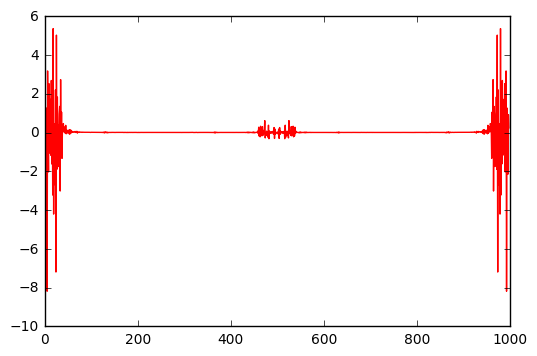

10396.2918685


In [1341]:
#fourier_samples[0]
which =30


ys = fourier_samples[which][1:]
t = np.arange(len(ys))
freq = np.fft.fftfreq(t.shape[-1])


plt.plot(t,ys,'r')
plt.show()

print(max(fourier_samples[which]))


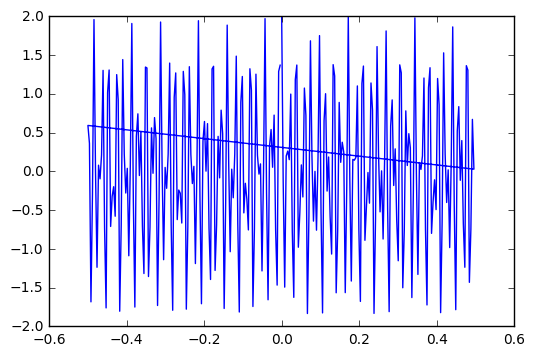

In [769]:
t = np.arange(256)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq,np.cos(5*t)+np.cos(2*t))
plt.show()

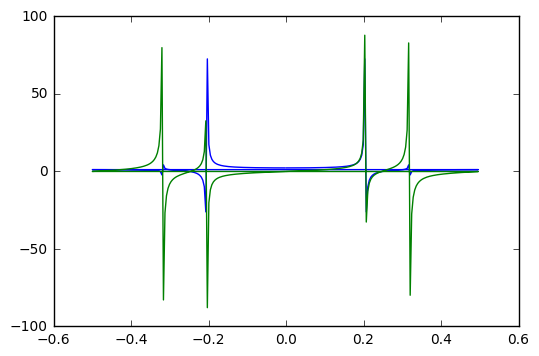

In [717]:
import matplotlib.pyplot as plt
#t = np.arange(256)
sp = np.fft.fft(np.cos(5*t)+np.cos(2*t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
#plt.plot(t,np.cos(t))
plt.show()